In [2]:
import torch

print("Torch version:", torch.__version__)

#Select device for training
#device = "cpu" #For this very simple dataset it is actually faster
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu") #Uncomment for GPU 

print(f'Using "{device}" for training')

Torch version: 1.9.0
Using "cuda" for training


In [3]:
from data import CIFAR10DataModule

cifar10 = CIFAR10DataModule(batch_size = 64)
cifar10.setup()

Files already downloaded and verified
Files already downloaded and verified


## BioLinear Example

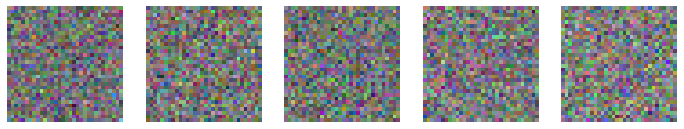

 20%|██        | 1/5 [00:02<00:09,  2.32s/it, conv: 31.851, lr: 0.074]

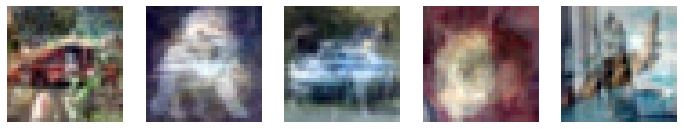

 40%|████      | 2/5 [00:04<00:06,  2.27s/it, conv: 0.710, lr: 0.055]

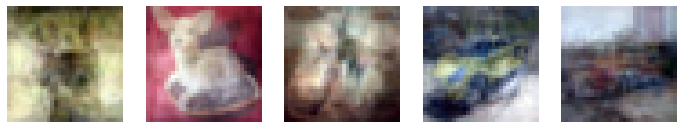

 60%|██████    | 3/5 [00:06<00:04,  2.30s/it, conv: 0.475, lr: 0.041]

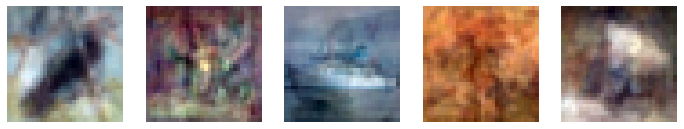

 80%|████████  | 4/5 [00:09<00:02,  2.27s/it, conv: 0.379, lr: 0.031]

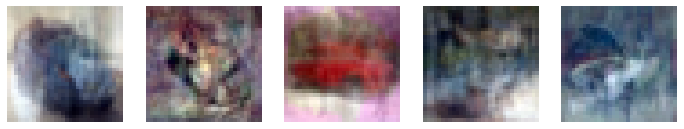

100%|██████████| 5/5 [00:11<00:00,  2.25s/it, conv: 0.379, lr: 0.023]

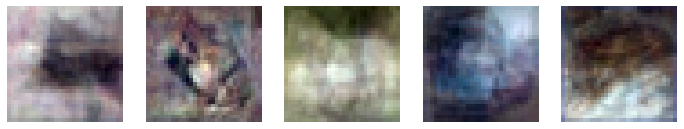

6it [00:13,  2.22s/it, conv: 0.379, lr: 0.017]

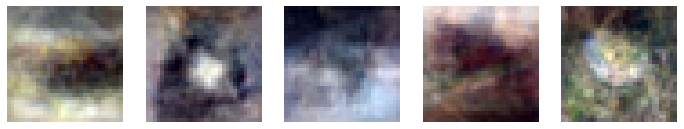

6it [00:13,  2.28s/it, conv: 0.379, lr: 0.017]
100%|██████████| 625/625 [00:02<00:00, 292.91it/s]


array(0.37889344, dtype=float32)

In [4]:
from biopytorch import BioLinear, bio_train
from plotting import plot_rgb_filters

biolinear = BioLinear(3 * 32 * 32, 200, bias = True, delta=.1, ranking_param=2, lebesgue_p=2).cuda()

def plot_filters_callback(weights):
    """
    Plot the first 5 weights
    """
    
    plot_rgb_filters(weights[:5].reshape(5, 3, 32, 32))

plot_filters_callback(biolinear.weight.cpu()) #Initial filters

bio_train(biolinear, cifar10, n_epochs=5, epoch_callback=plot_filters_callback, lr_scheduler=(.1, .001, .3))

## BioConv2d Example

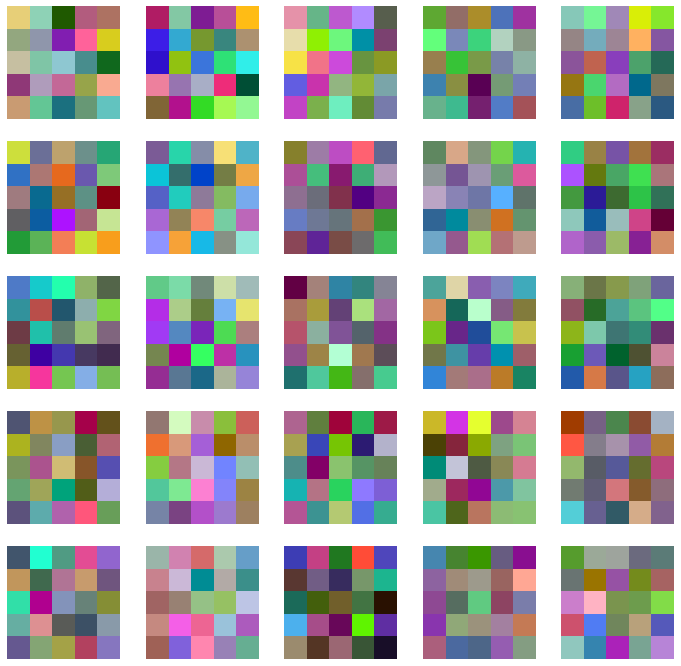

 20%|██        | 1/5 [00:12<00:51, 12.84s/it, conv: 1.051, lr: 0.003]

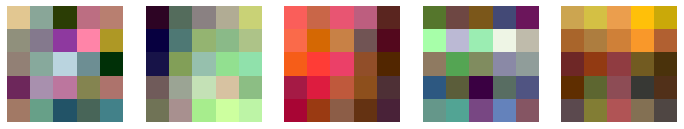

 40%|████      | 2/5 [00:26<00:39, 13.06s/it, conv: 0.020, lr: 0.001]

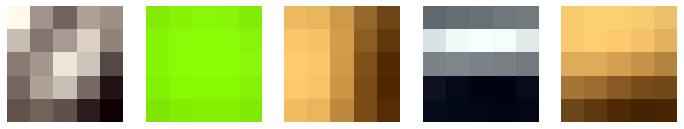

 60%|██████    | 3/5 [00:39<00:26, 13.16s/it, conv: 0.001, lr: 0.001]

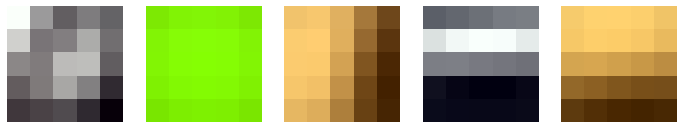

100%|██████████| 625/625 [00:13<00:00, 47.03it/s]


array(0.00083697, dtype=float32)

In [5]:
from biopytorch.bioconv2d import BioConv2d
from biopytorch.biotrainer import bio_train
from plotting import plot_rgb_filters

def plot_filters_callback(weights):
    plot_rgb_filters(weights[:5])
    
bioconv = BioConv2d(3, 96, kernel_size=5, ranking_param=2, lebesgue_p=3, delta=.2).cuda() #delta=.05 works too
plot_rgb_filters(bioconv.weight.cpu())
bio_train(bioconv, cifar10, n_epochs=5, epoch_callback=plot_filters_callback, lr_scheduler=(.007, .0001, .8))